<a href="https://colab.research.google.com/github/naqi72/Finetuning_TTS_Model/blob/main/ENGLISH_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install datasets soundfile speechbrain


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 807.2/807.2 kB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.2/722.2 kB 50.5 MB/s eta 0:00:00


In [5]:
!pip install git+https://github.com/huggingface/transformers.git


  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-g2lir8xl
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-g2lir8xl
  Resolved https://github.com/huggingface/transformers.git to commit 1d063793318b20654ebb850f48f43e0a247ab7bb
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 18.6 MB/s eta 0:00:00
  Created wheel for transformers: filename=transformers-4.47.0.dev0-py3-none-any.whl size=10036538 sha256=569bf7a2ba309a1851f34edc1373d36df55d78609a14b85b00feec3200a8b6fc
  Stored in directory: /tmp/pip-ephem-wheel-cache-n_sv79os/wheels/e7/9c/5b/e1a9c8007c343041e61cc484433d512ea9274272e3fcbe7c16
Successfully built transformers
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      S

In [6]:
!pip install --upgrade accelerate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.9/330.9 kB 10.9 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.34.2
    Uninstalling accelerate-0.34.2:
      Successfully uninstalled accelerate-0.34.2


In [2]:
!nvidia-smi


Sun Oct 27 01:54:50 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [7]:
from transformers import SpeechT5Processor, SpeechT5ForTextToSpeech

processor = SpeechT5Processor.from_pretrained("microsoft/speecht5_tts")
model = SpeechT5ForTextToSpeech.from_pretrained("microsoft/speecht5_tts")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/232 [00:00<?, ?B/s]

spm_char.model:   0%|          | 0.00/238k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.06k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/585M [00:00<?, ?B/s]

In [8]:
from datasets import load_dataset, Audio

dataset = load_dataset(
    "Yassmen/TTS_English_Technical_data", split="train"
)


model.safetensors:   0%|          | 0.00/585M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/333 [00:00<?, ?B/s]

train-00000-of-00004.parquet:   0%|          | 0.00/469M [00:00<?, ?B/s]

train-00001-of-00004.parquet:   0%|          | 0.00/466M [00:00<?, ?B/s]

train-00002-of-00004.parquet:   0%|          | 0.00/468M [00:00<?, ?B/s]

train-00003-of-00004.parquet:   0%|          | 0.00/541M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/9951 [00:00<?, ? examples/s]

In [9]:
dataset = dataset.cast_column("audio", Audio(sampling_rate=16000))


In [10]:
tokenizer = processor.tokenizer


In [11]:
def extract_all_chars(batch):
    all_text = " ".join(batch["transcription"])
    vocab = list(set(all_text))
    return {"vocab": [vocab], "all_text": [all_text]}


vocabs = dataset.map(
    extract_all_chars,
    batched=True,
    batch_size=-1,
    keep_in_memory=True,
    remove_columns=dataset.column_names,
)

dataset_vocab = set(vocabs["vocab"][0])
tokenizer_vocab = {k for k, _ in tokenizer.get_vocab().items()}


Map:   0%|          | 0/9951 [00:00<?, ? examples/s]

In [12]:

dataset_vocab - tokenizer_vocab


{'\n',
 ' ',
 '$',
 '%',
 '&',
 '*',
 '+',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '@',
 '_',
 '\xa0',
 '’',
 '“',
 '”'}

In [13]:
import re

def normalize_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation (except apostrophes)
    text = re.sub(r'[^\w\s\']', '', text)

    # Remove extra whitespace
    text = ' '.join(text.split())

    return text

# Define a function to add the normalized_text column
def add_normalized_text(example):
    example['normalized_text'] = normalize_text(example['transcription'])
    return example

# Apply the function to the dataset
dataset = dataset.map(add_normalized_text)

# Print the first few examples to verify
print(dataset[2:5])

Map:   0%|          | 0/9951 [00:00<?, ? examples/s]

{'audio': [{'path': 'YT2-9833.wav', 'array': array([-0.00598094,  0.03031809, -0.03093819, ..., -0.0726028 ,
       -0.07300073, -0.07294128]), 'sampling_rate': 16000}, {'path': 'YT2-7339.wav', 'array': array([0.00041708, 0.0048018 , 0.01064588, ..., 0.01377195, 0.01513178,
       0.        ]), 'sampling_rate': 16000}, {'path': 'YT2-10540.wav', 'array': array([ 0.13768291,  0.14736655,  0.05810779, ..., -0.02962811,
       -0.04119447, -0.04133903]), 'sampling_rate': 16000}], 'transcription': ["Twilio does have one of\nthose but if you were looking at one of these that didn't,", "plus 3 and so it's just basically it continues the generation in all the", 'There are people, you\nmight not think about this, but there are people who are\ngoing to use your application'], 'normalized_text': ["twilio does have one of those but if you were looking at one of these that didn't", "plus 3 and so it's just basically it continues the generation in all the", 'there are people you might not think abou

In [14]:
def extract_all_chars(batch):
    all_text = " ".join(batch["normalized_text"])
    vocab = list(set(all_text))
    return {"vocab": [vocab], "all_text": [all_text]}


vocabs = dataset.map(
    extract_all_chars,
    batched=True,
    batch_size=-1,
    keep_in_memory=True,
    remove_columns=dataset.column_names,
)

dataset_vocab = set(vocabs["vocab"][0])
tokenizer_vocab = {k for k, _ in tokenizer.get_vocab().items()}


Map:   0%|          | 0/9951 [00:00<?, ? examples/s]

In [15]:
dataset_vocab - tokenizer_vocab


{' ', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '_'}

In [16]:
# replacements = [
#     ('API', 'A-P-I'),
#     ('OAuth', 'o-auth'),
#     ('REST', 'rest'),
#     ('SQL', 'S-Q-L'),
#     ('CUDA', 'koodaa'),
#     ('TTS', 'T-T-S'),
#     ('HTTP', 'H T T P'),
#     ('JSON', 'J-SON'),
#     ('XML', 'X-M-L'),
#     ('SSH', 'S-S-H'),
#     ('SSL', 'S-S-L'),
#     ('DNS', 'D-N-S'),
#     ('GPU', 'G-P-U'),
#     ('CPU', 'C-P-U'),
#     ('FTP', 'F-T-P'),
#     ('VPN', 'V-P-N'),
#     ('TCP/IP', 'T-C-P/I-P'),
#     ('UI', 'U-I'),
#     ('UX', 'U-X'),
#     ('IDE', 'I-D-E'),
#     ('Git', 'Git'),
#     ('Docker', 'Docker'),
#     ('Kubernetes', 'kubernetes'),
#     ('PyTorch', 'pytorch'),
#     ('TensorFlow', 'tensorflow'),
#     ('GraphQL', 'graphql'),
#     ('CI/CD', 'ci-cd'),
#     ('JWT', 'J-W-T'),
#     ('WebSocket', 'websocket'),
#     ('0', 'zero'),
#     ('1', 'one'),
#     ('2', 'two'),
#     ('3', 'three'),
#     ('4', 'four'),
#     ('5', 'five'),
#     ('6', 'six'),
#     ('7', 'seven'),
#     ('8', 'eight'),
#     ('9', 'nine'),
# ]

# def cleanup_text(inputs):
#     for src, dst in replacements:
#         inputs["normalized_text"] = inputs["normalized_text"].replace(src, dst)
#     return inputs

# dataset = dataset.map(cleanup_text)


In [17]:
import os
import torch
from speechbrain.pretrained import EncoderClassifier

spk_model_name = "speechbrain/spkrec-xvect-voxceleb"

device = "cuda" if torch.cuda.is_available() else "cpu"
speaker_model = EncoderClassifier.from_hparams(
    source=spk_model_name,
    run_opts={"device": device},
    savedir=os.path.join("/tmp", spk_model_name),
)


def create_speaker_embedding(waveform):
    with torch.no_grad():
        speaker_embeddings = speaker_model.encode_batch(torch.tensor(waveform))
        speaker_embeddings = torch.nn.functional.normalize(speaker_embeddings, dim=2)
        speaker_embeddings = speaker_embeddings.squeeze().cpu().numpy()
    return speaker_embeddings


<ipython-input-17-f28baad2ea60>:3: UserWarning: Module 'speechbrain.pretrained' was deprecated, redirecting to 'speechbrain.inference'. Please update your script. This is a change from SpeechBrain 1.0. See: https://github.com/speechbrain/speechbrain/releases/tag/v1.0.0
  from speechbrain.pretrained import EncoderClassifier


hyperparams.yaml:   0%|          | 0.00/2.04k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/speechbrain/utils/autocast.py:68: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)


embedding_model.ckpt:   0%|          | 0.00/16.9M [00:00<?, ?B/s]

mean_var_norm_emb.ckpt:   0%|          | 0.00/3.20k [00:00<?, ?B/s]

classifier.ckpt:   0%|          | 0.00/15.9M [00:00<?, ?B/s]

label_encoder.txt:   0%|          | 0.00/129k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/speechbrain/utils/checkpoints.py:194: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(path, map_location=device

In [18]:
def prepare_dataset(example):
    # load the audio data; if necessary, this resamples the audio to 16kHz
    audio = example["audio"]

    # feature extraction and tokenization
    example = processor(
        text=example["normalized_text"],
        audio_target=audio["array"],
        sampling_rate=audio["sampling_rate"],
        return_attention_mask=False,
    )

    # strip off the batch dimension
    example["labels"] = example["labels"][0]

    # use SpeechBrain to obtain x-vector
    example["speaker_embeddings"] = create_speaker_embedding(audio["array"])

    return example


In [20]:
processed_example = prepare_dataset(dataset[0])


In [21]:
list(processed_example.keys())


['input_ids', 'labels', 'speaker_embeddings']

In [22]:
tokenizer.decode(processed_example["input_ids"])


'so this point one i just guessed it so one question is how do you determine</s>'

In [23]:
processed_example["speaker_embeddings"].shape


(512,)

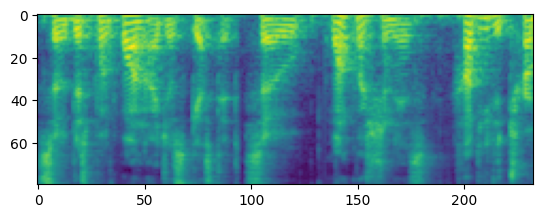

In [24]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(processed_example["labels"].T)
plt.show()


In [25]:
from transformers import SpeechT5HifiGan
vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")

config.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/50.7M [00:00<?, ?B/s]

In [26]:
spectrogram = torch.tensor(processed_example["labels"])
with torch.no_grad():
    speech = vocoder(spectrogram)


model.safetensors:   0%|          | 0.00/50.6M [00:00<?, ?B/s]

In [27]:
from IPython.display import Audio
Audio(speech.cpu().numpy(), rate=16000)


In [28]:
dataset = dataset.map(
    prepare_dataset, remove_columns=dataset.column_names,
)

Map:   0%|          | 0/9951 [00:00<?, ? examples/s]

In [29]:
def is_not_too_long(input_ids):
    input_length = len(input_ids)
    return input_length < 200

dataset = dataset.filter(is_not_too_long, input_columns=["input_ids"])

Filter:   0%|          | 0/9951 [00:00<?, ? examples/s]

In [30]:
dataset = dataset.train_test_split(test_size=0.1)


In [31]:
from dataclasses import dataclass
from typing import Any, Dict, List, Union


@dataclass
class TTSDataCollatorWithPadding:
    processor: Any

    def __call__(
        self, features: List[Dict[str, Union[List[int], torch.Tensor]]]
    ) -> Dict[str, torch.Tensor]:
        input_ids = [{"input_ids": feature["input_ids"]} for feature in features]
        label_features = [{"input_values": feature["labels"]} for feature in features]
        speaker_features = [feature["speaker_embeddings"] for feature in features]

        # collate the inputs and targets into a batch
        batch = processor.pad(
            input_ids=input_ids, labels=label_features, return_tensors="pt"
        )

        # replace padding with -100 to ignore loss correctly
        batch["labels"] = batch["labels"].masked_fill(
            batch.decoder_attention_mask.unsqueeze(-1).ne(1), -100
        )

        # not used during fine-tuning
        del batch["decoder_attention_mask"]

        # round down target lengths to multiple of reduction factor
        if model.config.reduction_factor > 1:
            target_lengths = torch.tensor(
                [len(feature["input_values"]) for feature in label_features]
            )
            target_lengths = target_lengths.new(
                [
                    length - length % model.config.reduction_factor
                    for length in target_lengths
                ]
            )
            max_length = max(target_lengths)
            batch["labels"] = batch["labels"][:, :max_length]

        # also add in the speaker embeddings
        batch["speaker_embeddings"] = torch.tensor(speaker_features)

        return batch

In [32]:
data_collator = TTSDataCollatorWithPadding(processor=processor)


In [33]:
features = [
    dataset["train"][0],
    dataset["train"][1],
    dataset["train"][20],
]

batch = data_collator(features)


In [34]:
{k:v.shape for k,v in batch.items()}


{'input_ids': torch.Size([3, 80]),
 'attention_mask': torch.Size([3, 80]),
 'labels': torch.Size([3, 262, 80]),
 'speaker_embeddings': torch.Size([3, 512])}

In [35]:
from huggingface_hub import notebook_login

notebook_login()


In [36]:
model.config.use_cache = False


In [37]:
from functools import partial

model.generate = partial(model.generate, use_cache=True)


In [38]:
from transformers import Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    output_dir="speecht5_finetuned_rohit_tech_words",  # change to a repo name of your choice
    per_device_train_batch_size=14,
    gradient_accumulation_steps=2,
    learning_rate=1e-5,
    warmup_steps=1000,
    max_steps=4000,
    gradient_checkpointing=True,
    fp16=True,
    evaluation_strategy="steps",
    per_device_eval_batch_size=10,
    save_steps=500,
    eval_steps=500,
    logging_steps=25,
    report_to=["tensorboard"],
    load_best_model_at_end=True,
    greater_is_better=False,
    label_names=["labels"],
    push_to_hub=True,
)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1559: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [39]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    args=training_args,
    model=model,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    data_collator=data_collator,
    tokenizer=processor,
)


<ipython-input-39-3e9fd9c3f140>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(
max_steps is given, it will override any value given in num_train_epochs


In [40]:
trainer.train()


Step,Training Loss,Validation Loss
500,1.333100,0.571922
1000,1.067500,0.486125
1500,1.042700,0.473245


/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:2816: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 1876}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


Step,Training Loss,Validation Loss
500,1.333100,0.571922
1000,1.067500,0.486125
1500,1.042700,0.473245
2000,1.008800,0.466738
2500,1.005200,0.463745
3000,0.986200,0.461331
3500,0.978800,0.459673
4000,0.979200,0.459729


TrainOutput(global_step=4000, training_loss=1.090457483768463, metrics={'train_runtime': 4508.2167, 'train_samples_per_second': 24.844, 'train_steps_per_second': 0.887, 'total_flos': 1.1243576566417536e+16, 'train_loss': 1.090457483768463, 'epoch': 12.519561815336463})

In [45]:
kwargs = {
    "dataset_tags": "microsoft/speecht5_tts",
    "dataset": "TTS_English_Technical_data",
    "dataset_args": "split: train",
    "model_name": "SyedNaqi_TechSpeechT5_TTS",
    "finetuned_from": "microsoft/speecht5_tts",
    "tasks": "text-to-speech",
    "tags": "tts",
}


In [46]:
trainer.push_to_hub(**kwargs)


events.out.tfevents.1729994729.3de66063b6dc.294.0:   0%|          | 0.00/43.0k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/naqi72/speecht5_finetuned_rohit_tech_words/commit/5fee04717af3b599bcd9d675a7b7907b58050bd0', commit_message='End of training', commit_description='', oid='5fee04717af3b599bcd9d675a7b7907b58050bd0', pr_url=None, pr_revision=None, pr_num=None)

In [47]:
model = SpeechT5ForTextToSpeech.from_pretrained("naqi72/SpeechT5_Finetune_English_Naqi")


config.json:   0%|          | 0.00/2.11k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/578M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [48]:
example = dataset["test"][304]
speaker_embeddings = torch.tensor(example["speaker_embeddings"]).unsqueeze(0)
speaker_embeddings.shape

torch.Size([1, 512])

In [49]:
text = "OAuth secures APIs, CUDA boosts GPU, TTS converts text."


In [50]:
inputs = processor(text=text, return_tensors="pt")


In [51]:
spectrogram = model.generate_speech(inputs["input_ids"], speaker_embeddings)


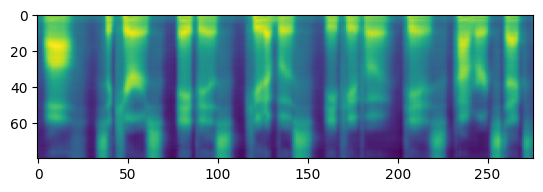

In [52]:
plt.figure()
plt.imshow(spectrogram.T)
plt.show()


In [53]:
with torch.no_grad():
    speech = vocoder(spectrogram)


In [54]:
from IPython.display import Audio
Audio(speech.numpy(), rate=16000)


In [55]:
import soundfile as sf
sf.write("output.wav", speech.numpy(), samplerate=16000)


In [56]:
import time
start_time = time.time()

# Run inference
from IPython.display import Audio
Audio(speech.numpy(), rate=16000)

# Stop the timer
end_time = time.time()

# Calculate inference time
inference_time = end_time - start_time
print(f"Inference Time: {inference_time:.4f} seconds")

Inference Time: 0.0019 seconds
